In [20]:
#%matplotlib notebook
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ur = "https://launchlibrary.net/1.4/launch/"
#rock = requests.get(url).json()
sdata = pd.read_csv("Rocket_names_modified.csv")
sdata.head()

,rocket name
0,Sputnik
1,Vanguard
2,Explorer
3,NOTS
4,Pioneer


In [21]:
name = []
date = []
o_name = []
sf = []
reason_f = []
lat = []
lng = []
for r in sdata['rocket name']:
    url = ur + str(r)
    rock = requests.get(url).json()
    try:
        
        for f in range(len(rock['launches'])):
            temp_name = str(rock["launches"][f]['name'])
            temp_date = str(rock['launches'][f]['windowend'])
            temp_o_name = (str(rock['launches'][f]['lsp']['name']))
            temp_lat = (float(rock["launches"][f]["location"]["pads"][0]["latitude"]))
            temp_lng = float(rock["launches"][f]["location"]["pads"][0]["longitude"])
            if str(rock["launches"][f]['failreason']) not in ["None", ""]:
                temp_reason_f = str(rock["launches"][f]['failreason'])
                temp_sf = "F"
            else:
                temp_sf = "S"
                temp_reason_f = "Na"
            name.append(temp_name)
            date.append(temp_date)
            o_name.append(temp_o_name)
            sf.append(temp_sf)
            reason_f.append(temp_reason_f)
            lat.append(temp_lat)
            lng.append(temp_lng)
    except KeyError:
        pass
        
        
rocksf = {"rockets name": name, "organization name": o_name, "date": date,"lat": lat, "lng": lng,
          "S/F": sf, "reason for failure": reason_f}
#for key in rocksf:
#    print(key)
#    print(len(rocksf[key]))
#    print()
rocksf = pd.DataFrame(rocksf)
rocksf

,rockets name,organization name,date,lat,lng,S/F,reason for failure
0,Pegasus XL | Fast Auroral Snapshot Explorer (F...,Orbital Sciences Corporation,"August 21, 1996 09:47:00 UTC",34.732778,-120.568056,S,Na
1,Pegasus XL | High Energy Transient Explorer (H...,Orbital Sciences Corporation,"November 4, 1996 17:08:00 UTC",37.938611,-75.457222,F,Battery failure in the Pegasus XL rocket third...
2,Pegasus XL | Broadband Advanced Technologies S...,Orbital Sciences Corporation,"February 26, 1998 07:07:00 UTC",34.732778,-120.568056,S,Na
3,Pegasus XL | Transition Region and Coronal Exp...,Orbital Sciences Corporation,"April 2, 1998 02:42:00 UTC",34.732778,-120.568056,S,Na
4,Pegasus XL | Wide Field Infrared Explorer (WIRE),Orbital Sciences Corporation,"March 5, 1999 02:56:00 UTC",34.732778,-120.568056,S,Na
5,Pegasus Hybrid | High Energy Transient Explore...,Orbital Sciences Corporation,"October 9, 2000 05:38:00 UTC",8.716667,167.733333,S,Na
6,Pegasus XL | Galaxy Evolution Explorer (GALEX),Orbital Sciences Corporation,"April 28, 2003 12:00:00 UTC",28.455556,-80.527778,S,Na
7,Pegasus XL | Interstellar Boundary Explorer (I...,Orbital Sciences Corporation,"October 19, 2008 17:47:23 UTC",8.716667,167.733333,S,Na
8,Pegasus XL | Ionospheric Connection Explorer (...,Northrop Grumman Innovation Systems,"December 1, 2018 00:00:00 UTC",28.455556,-80.527778,S,Na
9,Ariane 5 ECA | JUICE (JUpiter ICy moons Explorer),Arianespace,"January 1, 2022 00:00:00 UTC",5.239000,-52.768000,S,Na


In [22]:
#rocksf.loc[rocksf['S/F'] == 'F'].count()
rocksf['S/F'].value_counts()

S    528
F     28
Name: S/F, dtype: int64

In [23]:
rocksf.to_csv("rocket_launch.csv")


2010.0    5
1996.0    5
2004.0    2
2007.0    2
2006.0    2
1974.0    2
2017.0    2
1995.0    2
1994.0    2
2011.0    1
2001.0    1
2014.0    1
2009.0    1
Name: year, dtype: int64


<IPython.core.display.Javascript object>


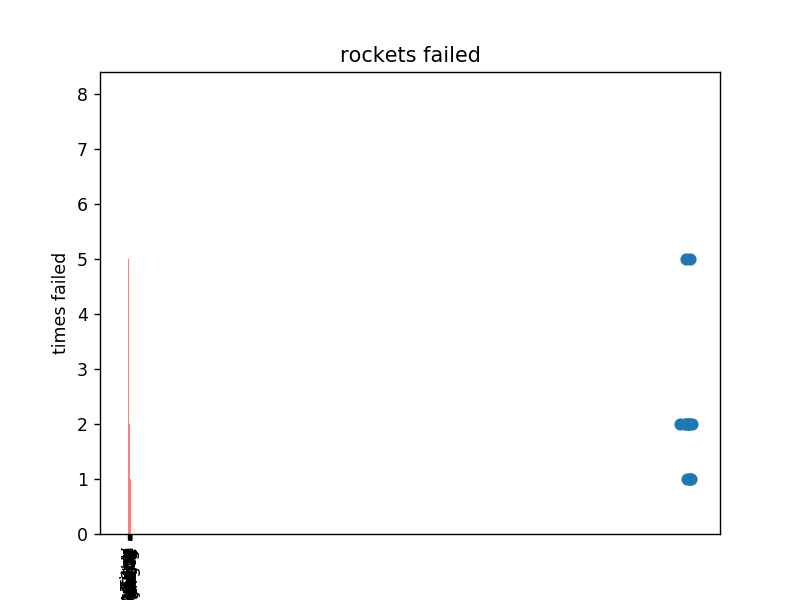

In [24]:
rock_fails = rocksf.loc[rocksf['S/F'] == 'F']
date = [ i for i in rock_fails['date']]
year = []
for y in date:
    for s in y.split(): 
        if s.isdigit():
            year.append(float(s))

year = {'year': year}
year = pd.DataFrame(year)
print(year['year'].value_counts())
#print(year['year'].groupby().count())

plt.plot(year['year'].value_counts(), marker = 'o', linewidth=0)
plt.show()

In [25]:
rock_fails['rockets name'].value_counts()
rock_fails

,rockets name,organization name,date,lat,lng,S/F,reason for failure
1,Pegasus XL | High Energy Transient Explorer (H...,Orbital Sciences Corporation,"November 4, 1996 17:08:00 UTC",37.938611,-75.457222,F,Battery failure in the Pegasus XL rocket third...
44,Proton-M/Blok DM-03 Enhanced | 3 x Glonass-M (...,Khrunichev State Research and Production Space...,"December 5, 2010 10:25:00 UTC",46.071001,62.984999,F,Human error during fueling caused the upper st...
139,Pegasus XL | Space Test Experiments Platform 1...,Orbital Sciences Corporation,"June 27, 1994 21:15:00 UTC",34.732778,-120.568056,F,Flight termination after loss of vehicle contr...
140,Pegasus XL | Space Test Experiments Platform-3...,Orbital Sciences Corporation,"June 22, 1995 19:58:00 UTC",34.732778,-120.568056,F,Destroyed during second stage flight
148,Soyuz-2.1b/Fregat | Meteor-M №2-1,Russian Federal Space Agency (ROSCOSMOS),"November 28, 2017 05:41:46 UTC",51.884395,128.333932,F,An algorithm glitch caused the Fregat upper st...
177,Long March 3B/E | Chinasat-9A (Zhongxing-9A),China Aerospace Science and Technology Corpora...,"June 18, 2017 16:36:00 UTC",28.246017,102.026556,F,The satellite was placed into the wrong orbit ...
207,Titan IIIE | Sphinx (Titan IIIE Maiden Flight),Lockheed Martin,"February 11, 1974 13:48:02 UTC",28.583410,-80.583036,F,Centaur LOX turbopump malfunction. RSO destruc...
234,Titan IIIE | Sphinx (Titan IIIE Maiden Flight),Lockheed Martin,"February 11, 1974 13:48:02 UTC",28.583410,-80.583036,F,Centaur LOX turbopump malfunction. RSO destruc...
246,Long March 3B | Palapa-D,China Aerospace Science and Technology Corpora...,"August 31, 2009 00:09:28 UTC",28.246017,102.026556,F,The satellite was deployed into the wrong orbit.
310,Pegasus XL | Space Test Experiments Platform 1...,Orbital Sciences Corporation,"June 27, 1994 21:15:00 UTC",34.732778,-120.568056,F,Flight termination after loss of vehicle contr...


In [26]:
name = [ i for i in rock_fails['rockets name']]
name_rocket = []
for r in name:
    n = r.split(' ')
    name_rocket.append(n[0])
    
name_rocket = {"name rocket": name_rocket}
name_rocket = pd.DataFrame(name_rocket)
name_rocket['name rocket'].value_counts()
name_rocket_group = name_rocket.groupby('name rocket')
name_rocket['name rocket'].value_counts()

Pegasus              8
GSLV                 5
Proton-M/Blok        2
Long                 2
Titan                2
Falcon               2
Delta                2
Ariane               1
Proton-M             1
Soyuz-2.1b/Fregat    1
Soyuz-U              1
Naro-1               1
Name: name rocket, dtype: int64

In [27]:
# x_axis = np.arange(len(name_rocket['name rocket'].value_counts()))
# tick = [value for value in x_axis]
data = name_rocket['name rocket'].value_counts()
plt.bar(data.index, data, color='r', alpha=0.5, align="center")
# plt.xticks(tick, name_rocket_group['name rocket'], rotation = 'vertical')
plt.xticks(rotation='vertical')
plt.title('rockets failed')
plt.xlabel('rockets')
plt.ylabel('times failed')
plt.show()

In [28]:
data_org = rock_fails['organization name'].value_counts()
plt.bar(data_org.index, data_org, color = 'red', alpha = .5, align='center')
plt.xticks(rotation = 'vertical')
plt.title('organization failure')
plt.xlabel("orginization")
plt.ylabel("times of failure")
plt.show()

In [10]:
rock_suc = rocksf.loc[rocksf['S/F'] == 'S']
rock_suc

,rockets name,organization name,date,lat,lng,S/F,reason for failure
0,Pegasus XL | Fast Auroral Snapshot Explorer (F...,Orbital Sciences Corporation,"August 21, 1996 09:47:00 UTC",34.732778,-120.568056,S,Na
2,Pegasus XL | Broadband Advanced Technologies S...,Orbital Sciences Corporation,"February 26, 1998 07:07:00 UTC",34.732778,-120.568056,S,Na
3,Pegasus XL | Transition Region and Coronal Exp...,Orbital Sciences Corporation,"April 2, 1998 02:42:00 UTC",34.732778,-120.568056,S,Na
4,Pegasus XL | Wide Field Infrared Explorer (WIRE),Orbital Sciences Corporation,"March 5, 1999 02:56:00 UTC",34.732778,-120.568056,S,Na
5,Pegasus Hybrid | High Energy Transient Explore...,Orbital Sciences Corporation,"October 9, 2000 05:38:00 UTC",8.716667,167.733333,S,Na
6,Pegasus XL | Galaxy Evolution Explorer (GALEX),Orbital Sciences Corporation,"April 28, 2003 12:00:00 UTC",28.455556,-80.527778,S,Na
7,Pegasus XL | Interstellar Boundary Explorer (I...,Orbital Sciences Corporation,"October 19, 2008 17:47:23 UTC",8.716667,167.733333,S,Na
8,Pegasus XL | Ionospheric Connection Explorer (...,Northrop Grumman Innovation Systems,"December 1, 2018 00:00:00 UTC",28.455556,-80.527778,S,Na
9,Ariane 5 ECA | JUICE (JUpiter ICy moons Explorer),Arianespace,"January 1, 2022 00:00:00 UTC",5.239000,-52.768000,S,Na
10,"Electron | Still Testing (Dove Pioneer, 2 x L...",Rocket Lab Ltd,"January 21, 2018 05:30:00 UTC",-39.262833,177.864469,S,Na


In [15]:
name = [ i for i in rock_suc['rockets name']]
name_rocket = []
for r in name:
    n = r.split(' ')
    name_rocket.append(n[0])
    
name_rocket_suc = {'rockets name': name_rocket}
name_rocket_suc = pd.DataFrame(name_rocket_suc)
data_suc = name_rocket_suc['rockets name'].value_counts()
plt.bar(data_suc.index, data_suc, color = 'blue', alpha = .5, align = 'center')
plt.xticks(rotation = 'vertical')
#plt.figure(figsize=(20,3))
plt.show()